In [32]:
import json
import pandas as pd
import C2Analyse
import matplotlib.pyplot as plt

pd.options.display.max_columns = None
verbose = 0

# Import the Data Files
This takes a while for large files.

In [34]:
df_athletes = C2Analyse.load_C2scrape_data("output/C2Athletes.json")
df_athletes.index.set_names("profile_id", inplace=True)
df_extended = C2Analyse.load_C2scrape_data("output/C2Extended.json")
df_extended.index.set_names("workout_id", inplace=True)
df_workouts = C2Analyse.load_C2scrape_data("output/C2Workouts.json")
df_workouts.index.set_names("workout_id", inplace=True)

if verbose == 1:
    display(df_athletes)
    display(df_extended)
    display(df_workouts)

# Basic Statistics

In [43]:
print(f"Number of workouts: {len(df_workouts)}")
print(f"Number of athletes: {len(df_athletes)}")
print(f"Number of extended workout data: {len(df_extended)}")

# df_workouts_by_year_event = df_workouts[["event","year"]].value_counts().unstack(level=-1)
# df_workouts_by_year_event_plot = df_workouts_by_year_event.plot.bar(title="Workouts by Event")

Number of workouts: 331944
Number of athletes: 81027
Number of extended workout data: 331747


# Join the Datasets Together

In [ ]:
df_athletes_workouts = pd.merge(left=df_workouts, right=df_athletes, left_on='profile_id', right_on="profile_id", right_index=True)
df_merged = pd.merge(left=df_athletes_workouts, right = df_extended, left_on='workout_id', right_on="workout_id", right_index=True)

print(f"Number of merged rows: {len(df_merged)}")

#

Why are there less rows in the merged data than there are workouts?

Did we fail to get some athlete profiles?

We can check by performing an outer merge and finding empty athlete profile values.

In [ ]:
df_merged = pd.merge(left=df_athletes_workouts, right = df_extended, left_on='workout_id', right_on="workout_id", right_index=True, how="outer")

print(f"Number of merged rows: {len(df_merged)}")

#

,pos.,name_x,age_x,location_x,country_x,club/affiliation,distance_x,verified_x,year,machine,event,retrieved_x,profile_id,rower,weight_x,gender_x,adaptive,category,name_y,availablity,age_y,country_y,location_y,team,height,weight_y,logbook id,member since,retrieved_y,affiliation,wingspan,email,website,adaptive rowing category,adaptive skiing category,age,gender_y,weight class,country,verified_y,type,time,distance_y,pace,date,entered,retrieved,race,adaptive category
workout_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
51157298,1,Benjamin Smith,32,"Brisbane, QLD",AUS,Fusion Sport,397,Yes,2021,rower,1,17-03-2021 22:13:09,1157105,rower,L,M,,NaN,Benjamin Smith,available,32,Australia,"Brisbane, QLD",Fusion Sport,6 ft 0 in,162 lb,1157105,"September 28, 2017",16-03-2021 12:58:26,NaN,NaN,NaN,NaN,NaN,NaN,32,Male,Lwt,Australia,Yes,Indoor Rower,1:00.0,397m,1:15.5,"February 02, 2021 20:16:00",ErgData Android,16-03-2021 07:54:16,NaN,NaN
49949686,2,Frederick Hancock,19,None,GBR,Forum Flyers,389,Yes,2021,rower,1,17-03-2021 22:13:09,1301914,rower,L,M,,NaN,Frederick Hancock,available,19,United Kingdom,NaN,Forum Flyers (since 2001),6 ft 2 in,163 lb,1301914,"December 04, 2019",16-03-2021 07:54:15,Forum Flyers,6 ft 5 in,NaN,NaN,NaN,NaN,19,Male,Lwt,United Kingdom,Yes,Indoor Rower,1:00.0,389m,1:17.1,"January 02, 2021 19:28:00",ErgData iOS,16-03-2021 07:54:16,NaN,NaN
48271042,3,Jasper Liu,26,None,USA,None,386,Yes,2021,rower,1,17-03-2021 22:13:09,1120032,rower,L,M,,NaN,Jasper Liu,available,26,United States,NaN,NaN,NaN,NaN,1120032,"December 30, 2016",16-03-2021 07:54:16,NaN,NaN,NaN,NaN,NaN,NaN,26,Male,Lwt,United States,Yes,Indoor Rower,1:00.0,386m,1:17.7,"November 09, 2020",Web,16-03-2021 07:54:17,NaN,NaN
45106891,4,Itai Almogy,18,None,USA,None,379,Yes,2021,rower,1,17-03-2021 22:13:09,1189208,rower,L,M,,NaN,Itai Almogy,available,19,United States,NaN,NaN,NaN,NaN,1189208,"March 08, 2018",16-03-2021 07:54:17,NaN,NaN,NaN,NaN,NaN,NaN,18,Male,Lwt,United States,Yes,Indoor Rower,1:00.0,379m,1:19.1,"June 13, 2020",Web,16-03-2021 07:54:17,NaN,NaN
48223141,5,Chris Gray,29,"Raleigh, NC",USA,University of North Carolina at Chapel Hill,372,Yes,2021,rower,1,17-03-2021 22:13:09,451524,rower,L,M,,NaN,Chris Gray,available,29,United States,"Raleigh, NC",Row House Raleigh Midtown,6 ft 4 in,190 lb,451524,"November 22, 2007",16-03-2021 07:54:16,University of North Carolina at Chapel Hill,NaN,NaN,NaN,NaN,NaN,29,Male,Lwt,United States,Yes,Indoor Rower,1:00.0,372m,1:20.6,"November 09, 2020",Web,16-03-2021 07:54:17,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50511001,456,Gregg Scheiferstein,59,"Vermilion, OH",USA,U.S. Coast Guard,301,Yes,2021,rower,1,17-03-2021 22:13:33,1403156,rower,L,M,,NaN,Gregg Scheiferstein,available,60,United States,"Vermilion, OH",NaN,5 ft 11 in,155 lb,1403156,"October 20, 2020",17-03-2021 22:13:59,U.S. Coast Guard,NaN,NaN,NaN,NaN,NaN,59,Male,Lwt,United States,Yes,Indoor Rower,1:00.0,301m,1:39.6,"January 16, 2021 11:54:00",ErgData iOS,17-03-2021 22:14:00,NaN,NaN
44838970,456,toni jesiorski,31,Dubai,GER,None,301,Yes,2021,rower,1,17-03-2021 22:13:33,1266423,rower,L,M,,NaN,toni jesiorski,available,32,Germany,Dubai,NaN,NaN,NaN,1266423,"May 15, 2019",17-03-2021 22:14:01,NaN,NaN,NaN,NaN,NaN,NaN,31,Male,Lwt,Germany,Yes,Indoor Rower,1:00.0,301m,1:39.6,"June 02, 2020 10:07:00",ErgData iOS,17-03-2021 22:14:02,NaN,NaN
49159109,456,Björn Lüssow,49,Reutlingen,GER,None,301,Yes,2021,rower,1,17-03-2021 22:13:33,1415369,rower,L,M,,NaN,Björn Lüssow,available,49,Germany,Reutlingen,NaN,5 ft 11 in,154 lb,1415369,"November 20, 2020",17-03-2021 22:14:03,NaN,NaN,NaN,NaN,NaN,NaN,49,Male,Lwt,Germany,Yes,Indoor Rower,1:00.0,301m,1:39.6,"December 09, 2020 19:43:00",ErgData iOS,17-03-2021 22:14:04,NaN,NaN


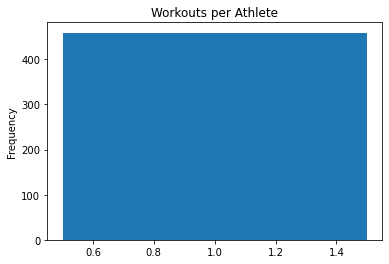

In [13]:
df_athletes_workouts = pd.merge(left=df_workouts, right=df_athletes, left_on='profile_id', right_on="profile_id", right_index=True)

df = pd.merge(left=df_athletes_workouts, right = df_extended, left_on='workout_id', right_on="workout_id", right_index=True)
display(df)

df_aw_count = df_athletes_workouts["profile_id"].value_counts()

bins = df_aw_count[0].max() #set bin size to 1
df_aw_count_plot = df_aw_count.plot(kind="hist", bins=bins, title="Workouts per Athlete")

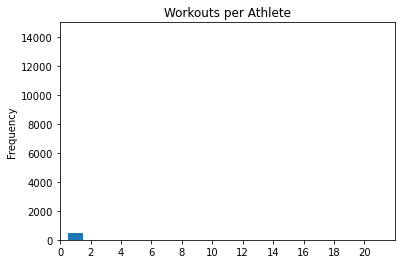

In [9]:
ymax = 15000
xmax = 22
num_ticks = 10
xticks=range(0,xmax,int(round(xmax/num_ticks,0)))
df_aw_count_plot = df_aw_count.plot(kind="hist", bins=bins, title="Workouts per Athlete", ylim=[0,ymax], xlim=[0,xmax], xticks=xticks)

#i actually want the below as an accumalative total of all the bars to the right (so I can look at e.g. 4, and see all the athletes with 4 or more activities) create a running total in the df with the sum of all values including and below this row

In [10]:
# plot country: import pycountry
# use %population